In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import matplotlib
import threading
import matplotlib.pyplot as plt 
import seaborn as sns

# Preprocessing

In [3]:
workingDirectory = '/home/h1bennet/liverStrains/results/180515_WGCNA//'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [4]:
%%bash
if [ ! -d ./qc_rna/ ]; then mkdir ./qc_rna; fi

In [5]:
# make summary table of qc stats
qc_stats = pd.DataFrame()

for sample in os.listdir('./tag_directories_rna/'):
    # pull tag information from HOMER output file
    tag_info_df = pd.read_table('./tag_directories_rna/'+sample+'/tagInfo.txt', sep='\t')
    qc_stats.loc[sample, 'uniquePositions'] = int(tag_info_df.iloc[0, 1])
    qc_stats.loc[sample, 'fragmentLengthEstimate'] = int(tag_info_df.iloc[1, 0].split('=')[1])
    qc_stats.loc[sample, 'tagsPerBP'] = float(tag_info_df.iloc[3, 0].split('=')[1])
    qc_stats.loc[sample, 'clonality'] = float(tag_info_df.iloc[4, 0].split('=')[1])
    qc_stats.loc[sample, 'GC_Content'] = float(tag_info_df.iloc[7, 0].split('=')[1])
    # f = open('./tag_directories_atac/'+sample+'/'+sample+'.mm10.bowtie2.log')
    # get mapping stats from bowtie log
    #for file in os.listdir('./tag_directories_rna/'+sample+'/'):
    #    if file.endswith(".log"):
    #        f = open('./tag_directories_rna/'+sample+'/'+file)
    #txt = f.read()
    #star_log = list(filter(None, re.split('\s|\|',txt)))
    #qc_stats.loc[sample, 'totalReads'] =int(star_log[29])
    #qc_stats.loc[sample, 'uniquelyMappedReads'] = int(star_log[41])
    #qc_stats.loc[sample, 'multiMappedReads'] = int(star_log[115])
    #qc_stats.loc[sample, 'frac_unmappedReads_mismatch'] = float(star_log[151].strip('%'))/100
    #qc_stats.loc[sample, 'frac_unmappedReads_short'] = float(star_log[158].strip('%'))/100
    #qc_stats.loc[sample, 'frac_unmappedReads_other'] = float(star_log[164].strip('%'))/100
    #qc_stats.loc[sample, 'uniquelyMappedFraction'] = \
    #                                                qc_stats.loc[sample, 'uniquelyMappedReads'] \
    #                                                / qc_stats.loc[sample, 'totalReads']
    #qc_stats.loc[sample, 'mappedFraction'] = 1 \
    #                                        - qc_stats.loc[sample, 'frac_unmappedReads_other'] \
    #                                        - qc_stats.loc[sample, 'frac_unmappedReads_short'] \
    #                                        - qc_stats.loc[sample, 'totalReads']
    
qc_stats.sort_index(inplace=True)
qc_stats.to_csv('./qc_rna/mapping_stats.tsv', sep='\t')


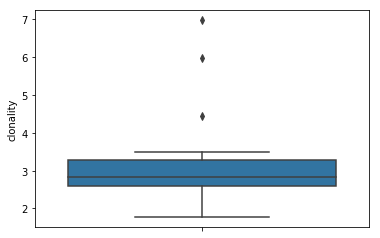

In [8]:
# clonality boxplot
fig = sns.boxplot(y=qc_stats['clonality']).get_figure()
fig.savefig('./qc_rna/clonality_boxplot_hb.pdf', bbox_inches='tight')

/home/h1bennet/anaconda3/envs/tba/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


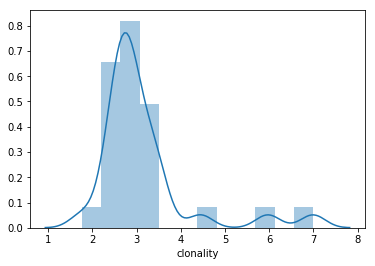

In [10]:
# clonality distplot
fig = sns.distplot(qc_stats['clonality']).get_figure()
fig.savefig('./qc_rna/clonality_distplot_hb.pdf', bbox_inches='tight')

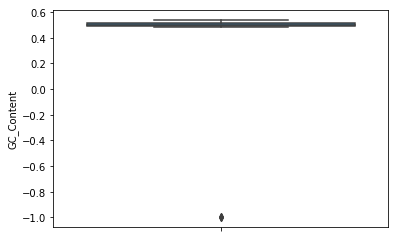

In [11]:
# GC_Content boxplot
fig = sns.boxplot(y=qc_stats['GC_Content']).get_figure()
fig.savefig('./qc_rna/GC_Content_boxplot_hb.pdf', bbox_inches='tight')

# Process Data For Input into WGCNA

In [12]:
%%bash
# if directories don't exist, create them
if [ ! -d ./expression/ ]; then mkdir ./expression; fi

analyzeRepeats.pl rna mm10 -count exons -condenseGenes -rpkm -d ./tag_directories_rna/* > ./expression/rna_exp_rpkm.tsv

	Tag Directories:
		./tag_directories_rna/aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3B
		./tag_directories_rna/aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3c
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ12a
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ12b
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ13a
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_CCl4_6weeks_AJ13b
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_Control_AJ11A
		./tag_directories_rna/aj_Tim4PosKupffer_RNA_Control_AJ11B
		./tag_directories_rna/balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3a
		./tag_directories_rna/balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3B
		./tag_directories_rna/balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3C
		./tag_directories_rna/balbc_KupfferTotal_RNA_AMLNDiet_30week_Balb3d
		./tag_directories_rna/balbc_Tim4PosKupffer_RNA_CCl4_6weeks_Balb12b
		./tag_directories_rna/balbc_Tim4PosKupffer_RNA_CCl4_6weeks_Balb13a
		./tag_directories_rna/balbc_Tim4PosKupffer_RNA_Control_B

In [13]:
%%bash

makeMultiWigHub.pl hrb_kupffer_disease_rna mm10 -force -d ./tag_directories_rna/*


	Once finished, you will want to upload the following hub URL:
		http://homer.ucsd.edu/hubs//hrb_kupffer_disease_rna/hub.txt

	If loading to the Wash U Epigenome Browser, use:
		http://homer.ucsd.edu/hubs//hrb_kupffer_disease_rna/washU.hub.txt


	Visualization fragment length = 75
	Output file: ./tag_directories_rna/aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3B/aj_KupfferTotal_RNA_AMLNDiet_30week_AJ3B.ucsc.bigWig
	No need to remove tags to get desired file size
	Generating bedGraph for chr1
	Generating bedGraph for chr10
	Generating bedGraph for chr11
	Generating bedGraph for chr12
	Generating bedGraph for chr13
	Generating bedGraph for chr14
	Generating bedGraph for chr15
	Generating bedGraph for chr16
	Generating bedGraph for chr17
	Generating bedGraph for chr18
	Generating bedGraph for chr19
	Generating bedGraph for chr2
	Generating bedGraph for chr3
	Generating bedGraph for chr4
	Generating bedGraph for chr5
	Generating bedGraph for chr6
	Generating bedGraph for chr7
	Generating bedGra

In [14]:
# create a trait data table
exp_data = pd.read_csv('./expression/rna_exp_rpkm.tsv', sep='\t')

In [69]:
# create sample df
sample = pd.Series(exp_data.columns.values[8:]).str.split('/').str[-1]
strain = sample.str.split('_').str[0]
cell = sample.str.split('_').str[1]
diet = sample.str.split('_').str[3]

color_dict = {'aj_AMLNDiet': '#e31a1c', 'aj_CCl4': '#67000d', 'aj_Control': '#fb9a99',
              'balbc_AMLNDiet': '#1f78b4', 'balbc_CCl4': '#08306b', 'balbc_Control': '#a6cee3',
              'C57Bl6_AMLNDiet': '#33a02c', 'C57Bl6_CCl4': '#00441b', 'C57Bl6_Control': '#b2df8a'}

color_vec = pd.Series([color_dict[i+'_'+j] for i, j in zip(strain, diet)])

sample_df = pd.DataFrame([samples, strain, cell, diet, color_vec],
                         index=['sample', 'strain', 'cell', 'diet', 'color']).T

sample_df = sample_df.set_index('sample')
sample_df.to_csv('./samples.txt', sep='\t')